## DATA CLEANING

Table of Contents
1.Diabetes Dataset

2. Marking Missing Values

3. Remove Rows With Missing Values

4. Fill Missing Values with a Test Stastic

1. Diabetes Dataset
The Diabetes Dataset involves predicting the onset of diabetes within 5 years in given medical details.

It is a binary (2-class) classification problem.

The number of observations for each class is not balanced.

There are 768 observations with 8 input variables and 1 output variable.

The variable names are as follows:

0. Number of times pregnant.

1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

2. Diastolic blood pressure (mm Hg).

3. Triceps skinfold thickness (mm).

4. 2-Hour serum insulin (mu U/ml).

5. Body mass index (weight in kg/(height in m)^2).

6. Diabetes pedigree function.

7. Age (years).

8. Class variable (0 or 1).

This dataset is known to have missing values.

Specifically, there are missing observations for some columns that are marked as a zero value.

We can corroborate this by the definition of those columns and the domain knowledge that a zero value is invalid for those measures, e.g. a zero for body mass index or blood pressure is invalid.

## 1. HANDLING MISSING VALUES

Importing the Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
missing_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/pima-indians-diabetes.csv', header=None)
missing_df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 2. Marking Missing Values

In [4]:
missing_df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that there are columns that have a minimum value of zero (0).

On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Specifically, the following columns have an invalid zero minimum value:

1. Plasma glucose concentration

2. Diastolic blood pressure

3. Triceps skinfold thickness

4. 2-Hour serum insulin

5. Body mass index

Let’s confirm this my looking at the raw data, the example prints the first 20 rows of data.

In [69]:
missing_df.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


We can get a count of the number of missing values on each of these columns.

We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True.

We can then count the number of true values in each column.

In [6]:
# Count the number of missing values for each column
num_missing = (missing_df[[1,2,3,4,5]] == 0).sum()

In [70]:
# Report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


We can see that columns 1, 2 and 5 have just a few zero values, whereas columns 3 and 4 show a lot more, nearly half of the rows.

This highlights that different “missing value” strategies may be needed for different columns, e.g. to ensure that there are still a sufficient number of records left to train a predictive model.

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.

Values with a NaN value are ignored from operations like sum, count, etc.

We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in.

After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.

In [74]:
# Replace '0' values with 'nan'
missing_df[[1,2,3,4,5]] = missing_df[[1,2,3,4,5]].replace(0, np.nan)

In [75]:
# Count the number of nan values in each column
print(missing_df.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


Running the above code prints the number of missing values in each column.

We can see that the columns 1:5 have the same number of missing values as zero values identified above.

This is a sign that we have marked the identified missing values correctly.

In [76]:
missing_df.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Missing Values Causes Problems
Having missing values in a dataset can cause errors with some machine learning algorithms.

Most predictive modeling techniques cannot handle any missing values.

Therefore, this problem must be addressed prior to modeling.

Now, we can look at methods to handle the missing values.

## 3. Remove Rows With Missing Values

The simplest strategy for handling missing data is to remove records that contain a missing value.

We can do this by creating a new Pandas DataFrame with the rows containing missing values removed.

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data.

We can use dropna() to remove all rows with missing data, as follows:

In [78]:
# Count the number of nan values in each column
print(missing_df.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [79]:
# Drop rows with missing values
reduced_df = missing_df.dropna()

In [80]:
# Summarize the shape of the data with missing rows removed
print(missing_df.shape)
print(reduced_df.shape)

(768, 9)
(392, 9)


After running this code, we can see that the number of rows has been aggressively cut from 768 in the original dataset to 392 with all rows containing a NaN removed.

But removing rows with missing values can be too limiting on some predictive modeling problems, and an alternative is to impute missing values.

### 3. Fill Missing Values with a Test Statistic

Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

A constant value that has meaning within the domain, such as 0, distinct from all other values.

A value from another randomly selected record.

A mean, median or mode value for the column.

A value estimated by another predictive model.

#### Using fillna():

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model.

This needs to be taken into consideration when choosing how to impute the missing values.

For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

Pandas provides the fillna() function for replacing missing values with a specific value.

For example, we can use fillna() to replace missing values with the mean value for each column, as follows:

In [81]:
# Count the number of nan values in each column
print(missing_df.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


You can provide the value you want to use to fill the missing values in the fillna function.

Use missing_df.median() for feature median values, missing_df.mode().iloc[0, :] for feature mode values.

Or, you can provide a constant string or numeric value to be used for filling the missing values.

In [16]:
# Fill missing values with mean column values
mean_filled_df = missing_df.fillna(missing_df.mean())

In [82]:
# Count the number of NaN values in each column
print(mean_filled_df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


Using SimpleImputer:
The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode).

The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

The example below uses the SimpleImputer class to replace missing values with the mean of each column then prints the number of NaN values in the transformed matrix.

In [83]:
from sklearn.impute import SimpleImputer

In [84]:
# Retrieve the numpy array
values = missing_df.values

In [85]:
values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [86]:
# Count the number of NaN values in each column
print('Missing: %d' % np.isnan(values).sum())

Missing: 652


##### You can change the strategy from mean to median, most_frequent, or constant, as per your requirements.

In [87]:
# Define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [88]:
imputer

SimpleImputer()

In [89]:
print(imputer)

SimpleImputer()


In [90]:
# Transform the dataset
transformed_values = imputer.fit_transform(values)

In [91]:
transformed_values


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [92]:
# Count the number of NaN values in each column
print('Missing: %d' % np.isnan(transformed_values).sum())

Missing: 0


Running this code shows that all NaN values were imputed successfully.

# HANDLING OUTLIERS

In [ ]:
np.random.seed(1)

data = np.random.randn(10)


In [93]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [94]:
np.random.seed(1)

# Generate univariate observations
data = 5 * np.random.randn(10000) + 50    # creates an array of specified shape and fills it with random values as per standard normal distribution.

In [95]:
data

array([58.12172682, 46.94121793, 47.35914124, ..., 44.92928092,
       49.68651887, 42.81065054])

Standard Deviation Method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

We can cover more of the data sample if we expand the range as follows:

1 Standard Deviation from the Mean: 68%

2 Standard Deviations from the Mean: 95%

3 Standard Deviations from the Mean: 99.7%



A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.

For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

We can calculate the mean and standard deviation of a given sample.

Then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

In [96]:
# Calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)
print('Mean:', data_mean)
print('Standard Deviation:', data_std)

Mean: 50.04886328349552
Standard Deviation: 4.993929218440242


The mean of the sample is 50.04 and the standard deviation is 4.99

In [31]:
# Identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print('Cut Off Value from Mean:', cut_off)
print('Lower Bound:', lower)
print('Upper Bound:', upper)

Cut Off Value from Mean: 14.981787655320726
Lower Bound: 35.06707562817479
Upper Bound: 65.03065093881625


#### The calculated cut-off value for identifying outliers is 14.98 from mean.

Using this value:

The lower bound for outliers is 35.06

The upper bound for outliers is 65.03

Any value outside these bounds will be treated as an outlier.

Filtering out those values from the data that are not within the defined limits.

In [33]:
# Identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


We identified a total of 29 outliers in our data.

Removing the identified outliers from the data.

In [34]:
# Remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9971


## Interquartile Range Method¶


Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

The percentiles can be calculated by sorting the observations and selecting values at specific indices.

The 50th percentile is the middle value, or the average of the two middle values for an even number of examples.

If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile.

The common value for the factor k is the value 1.5.

A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box.


Values that fall outside of these values are drawn as dots.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box and Whisker Plot')

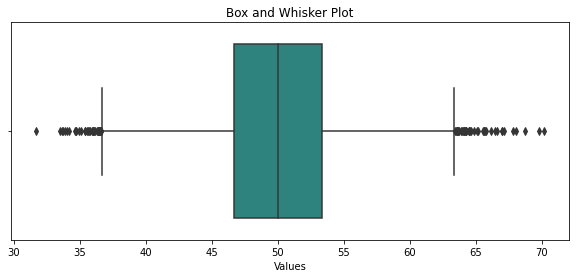

In [36]:
plt.figure(figsize=(10, 4))
sns.boxplot(data, palette='viridis')
plt.xlabel('Values')
plt.title('Box and Whisker Plot')

We can see the quartiles and fences in the boxplot.

Also, the points outside the fences are drawn as dots, meaning they are outliers.


We will now calculate the quartiles, and IQR of our data

In [37]:
# Calculate Interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674


In [38]:
# Calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Cut Off Value from 25th and 75th Quartiles:', cut_off)
print('Lower Bound:', lower)
print('Upper Bound:', upper)

Cut Off Value from 25th and 75th Quartiles: 10.01050258029353
Lower Bound: 36.67487321019591
Upper Bound: 63.369546757645324


The calculated cut-off value for identifying outliers is 10.01 from the 25th and 75th quartiles.

Using this value:

The lower bound for outliers is 36.67

The upper bound for outliers is 63.36

Any value outside these bounds will be treated as an outlier.

Filtering out those values from the data that are not within the defined limits.

In [40]:
# Identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 81


We identified a total of 81 outliers in our data.

Removing the identified outliers from the data.

In [41]:
# Remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9919


## Automatic Outlier Detection

Using LOF (Local Outlier Factor)
The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection.

Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood.

Those examples with the largest score are more likely to be outliers.

The scikit-learn library provides an implementation of this approach in the LocalOutlierFactor class.

In [42]:
import pandas as pd

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

Loading the Dataset

We will use the Boston Housing regression problem that has 13 inputs and one numerical target.

It requires learning the relationship between suburb characteristics and house prices.

In [44]:
# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


The dataset has 506 samples, and 14 variables.

The medv is the target variable.

First, we will retrieve the array of dataset values.

In [46]:
# Retrieve the array
data = df.values

In [47]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [49]:
# Split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [50]:
X, y

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [51]:
# Summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


- **Splitting** the data into **train** and **test sets**.


In [53]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [54]:
# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(339, 13) (339,)


We will fit a linear regression algorithm on the trainig set.

And, then evaluate model performance by making a predictions on the test data and evaluate the predictions using the mean absolute error (MAE).

In [55]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Evaluate the model
yhat = model.predict(X_test)

Evaluating the predictions made by the model on test set.

In [57]:
# Evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


##### Identifying Outliers using LOF

We will LocalOutlierFactor model to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1).

In [58]:
# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [59]:
# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [60]:
# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(305, 13) (305,)


###### Original train set had 339 samples, but after outlier removal we are left with 305 samples.

This implies that 34 rows were removed from the train set.

We can now fit and evaluate the model as per normal.



In [61]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Evaluate the model
yhat = model.predict(X_test)

In [63]:
# Evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.356


The model achieved a MAE of about 3.417, which is lower than what was obtained before outlier removal.